# Polinom Regresyon


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sbn

In [ ]:
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
veriler = pd.read_csv("MyDrive/Machine Learning/maaslar.csv")

In [ ]:
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [ ]:
veriler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unvan            10 non-null     object
 1   Egitim Seviyesi  10 non-null     int64 
 2   maas             10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


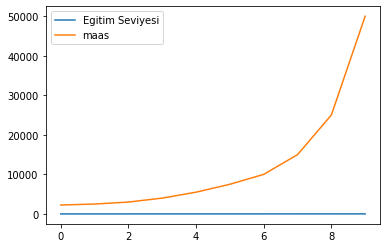

In [ ]:
veriler.plot()

data frame dilimleme

In [ ]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values

In [ ]:
print(x, "\n", y)

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10 
     maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000


## Linear deneme

linear model oluşturma

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Linear = LinearRegression()

In [ ]:
Linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

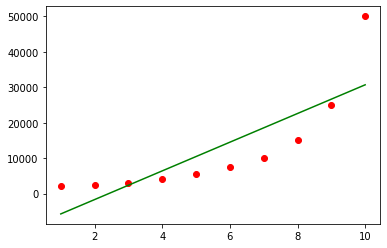

In [ ]:
plt.scatter(X,Y, color = "r")
plt.plot(x,Linear.predict(X), color="g")
plt.show()

## Polinomal Deneme

doğrusal olmayan 
Polinomial regresyon oluşturma

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
x_poly = poly.fit_transform(X)

In [ ]:
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [ ]:

Linear2 = LinearRegression()

In [ ]:
Linear2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

görselleştirme

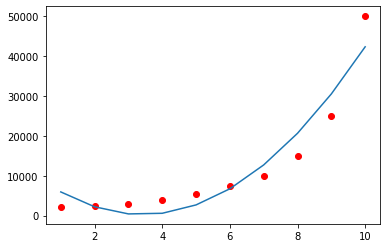

In [ ]:
plt.scatter(X,Y, color = "r")
plt.plot(x,Linear2.predict(x_poly))
plt.show()

### 4.dereceden


4. dereceden polinom regresyon 


In [ ]:
poly4 = PolynomialFeatures(degree=4)

In [ ]:
x_poly4 = poly4.fit_transform(X)

In [ ]:
Linear4 = LinearRegression()

In [ ]:
Linear4.fit(x_poly4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

görselleştirme

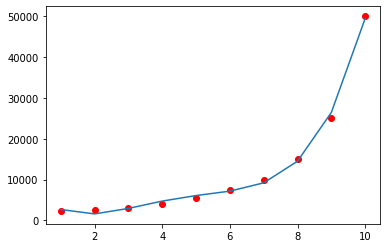

In [ ]:
plt.scatter(X,Y, color = "r")
plt.plot(x,Linear4.predict(x_poly4))
plt.show()

In [ ]:
print(Linear4.predict(x_poly4))

[[ 2667.83216783]
 [ 1587.99533799]
 [ 2932.1095571 ]
 [ 4731.64335664]
 [ 6086.24708625]
 [ 7163.75291375]
 [ 9200.17482518]
 [14499.70862471]
 [26434.73193474]
 [49445.80419581]]


## Support Vector Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc1 = StandardScaler()

In [ ]:
X_olcekli = sc1.fit_transform(X)

In [ ]:
sc2 = StandardScaler()

In [ ]:
Y_olcekli = sc2.fit_transform(Y)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_regression = SVR(kernel='rbf')
svr_regression.fit(X_olcekli,Y_olcekli)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

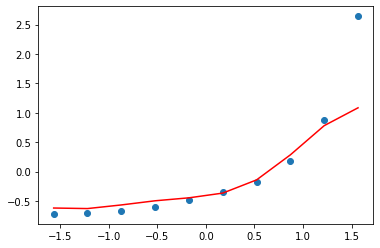

In [ ]:
plt.scatter(X_olcekli,Y_olcekli)
plt.plot(X_olcekli,svr_regression.predict(X_olcekli), color="red")

In [ ]:
print(svr_regression.predict([[11]]))
print(svr_regression.predict([[6.6]]))

[0.01150915]
[0.01150915]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
r_dt = DecisionTreeRegressor(random_state=0)

In [ ]:
r_dt.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

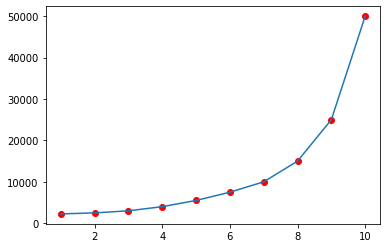

In [ ]:
plt.scatter(X,Y, color="red")
plt.plot(X,r_dt.predict(X))

In [ ]:
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

[50000.]
[10000.]


In [ ]:
Z = X + 0.5
K = X -0.4

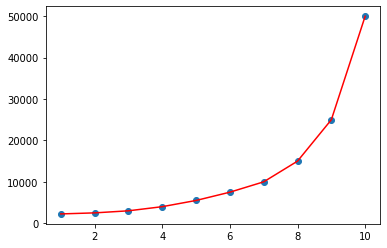

In [ ]:
plt.plot(X,r_dt.predict(Z), color = "red")
plt.scatter(X,r_dt.predict(K))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)

In [ ]:
rf_reg.fit(X,Y.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
print(rf_reg.predict([[11]]))
print(rf_reg.predict([[6.6]]))

[42500.]
[10500.]


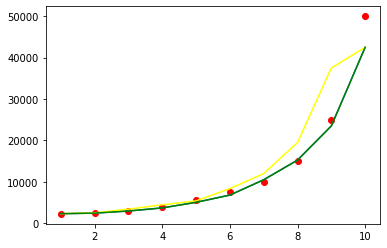

In [ ]:
plt.scatter(X,Y, color="red")
plt.plot(X,rf_reg.predict(X))
plt.plot(X,rf_reg.predict(Z), color="yellow")
plt.plot(X,rf_reg.predict(K), color="green"dola )